In [3]:
# Python boilerplate 
import numpy as np
import scipy as spy
import matplotlib.pyplot as plt
%matplotlib notebook
%config InlineBackend.print_figure_kwargs = {}
import seaborn as sns
sns.set_style("whitegrid")
# Optimization thingy 
from gurobipy import *

# Real-time Control of Stormwater Networks using Horizon Planning 

# Ann Arbor's Stormwater Network 
![network](../data/images/AA.png)

 # State of Stormwater 
 ![stormwater](../data/images/stateofss.png)

# Larger Infrastructure
![network](../data/images/chicago_channel.png)
**Chicago Sewers  (4 Billion USD)**

# Smarter Stormwater Network 
 ![stormwater](../data/images/network_smarter.png) 

# Real-time Control using Horizon Planning

1. Model of the network 
2. Algorithms 
    - Centralized Control
    - Distributed Control
3. Results 
4. Future work 

# Network Model 
Network ~ $G(N,A)$
- Nodes $(N)$: Storage elements in the network 
    - Max Capacity for $i^{th}$ node : $C_i$
    - Volume at time $t$ in $i^{th}$ node : $V^t_i$
    - Outflow at time $t$ from $i^{th}$ node : $x^t_i$
    - Inflow at time $t$ to $i^{th}$ node from rain : $q^t_i$
- Links $(A)$: Routing Elements
    - Max flow carrying capacity in $i^{th}$ link : $u_i$
    - Total flow through $i^{th}$ link for $T$ horizon : ${Vx}^T_i$

# Network dynamics

1. **Mass balance**
$$ V_i^t = V_i^{t-1} + q_i^{t-1} +  \sum_{j} x_{ji}^{t-\delta_{ji}} - \sum_{j} x_{ij}^{t-1}$$

$\delta_{ji}$ is the travel time between nodes

2. **Physical constraints on outflows from nodes**
$$ q_{out} \leq \sqrt{2 \times g \times water\ depth} \times C_D $$

<IPython.core.display.Javascript object>


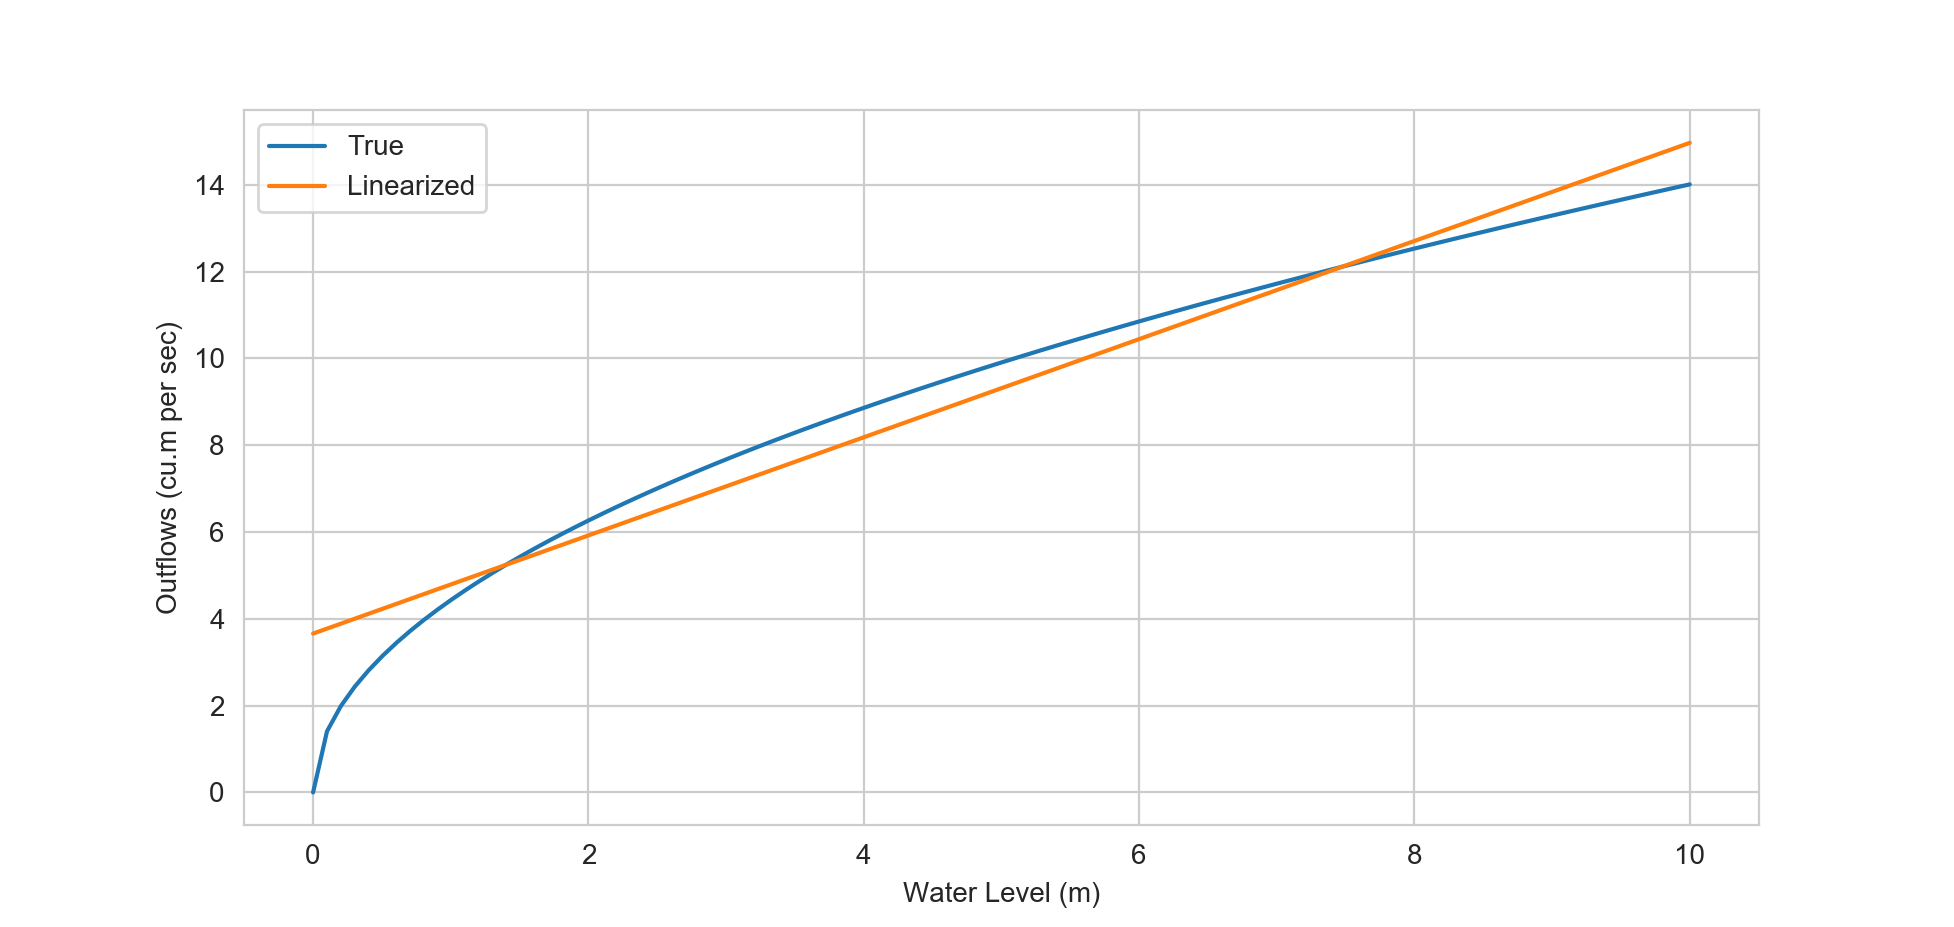

In [4]:
## Linearizing square root
height  = np.linspace(0,1000,100)/100    # (volume/area)
outflow = np.sqrt(2*9.81*height)         # Generate the outflows 
coeffws = np.polyfit(height, outflow, 1) # Get the first order polyfit 
plt.plot(height, outflow, label = "True")
plt.plot(height, coeffws[0]*height + coeffws[1], label = "Linearized")
plt.ylabel("Outflows (cu.m per sec)");plt.xlabel("Water Level (m)");plt.legend()

**Linearized constraint**
$$ q^t_{out} \leq 1.13047751 \times V^t_i/A_i + 3.65949363 $$

# Control Algorithm 

1. Centralized Control : Single Master Problem 
2. Distributed Control : Master Problem and a set of sub-problems 


# Centralized Control Algorithm 
***Objective Function***
$$ \min \sum^N_{i} \sum^T_t V_i^t $$
***Constraints***

_Mass Balance_:
$$ V_i^t = V_i^{t-1} + q_i^{t-1} +  \sum_{j} x_{ji}^{t-\delta_{ji}} - \sum_{j} x_{ij}^{t-1}\ \text{for}\ \forall t\  \text{and}\ \forall i \in N$$
_Flow thresholds_:
$$ x_{ij}^t \leq u_{ij}\ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$

_Outflow limitation_:
$$ x_{ij}^t \leq f(V_{ij}^{t-1}) \ \text{for}\ \forall t\  \text{and}\ \forall ij \in A$$

# Distributed Control Algorithm 